# Homework 8: Magnetization, Energy in the Ising Model

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Friday, June 16    

*Your Name*

# Problem 0

Please be sure to fill out:
1. The course survey (e-mailed directly to you; e-mail Prof. Tanedo if you have not received this!)
2. iEval course evaluation (http://ieval.ucr.edu)
3. Sign up for a "final interview": https://doodle.com/poll/xyb7dgcupq9gwaqm

# Problem 1

In [52]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt


def State(N):   
   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def Boundary_Cond(grid, beta):
    
    for i in range(N):
        for j in range(N):
                x = np.random.randint(0, N)
                y = np.random.randint(0, N)
                spin =  grid[x, y]
                Update = grid[(x+1)%N,y] + grid[x,(y+1)%N] + grid[(x-1)%N,y] + grid[x,(y-1)%N]
                delta_E = 2*spin*Update
                if delta_E < 0:
                    spin *= -1
                elif rand() < np.exp(-delta_E*beta):
                    spin *= -1
                grid[x, y] = spin
    return grid

def Energy(grid):
    
    energy = 1/4
    for i in range(len(grid)):
        for j in range(len(grid)):
            Spin = grid[i,j]
            Update = grid[(i+1)%N, j] + grid[i,(j+1)%N] + grid[(i-1)%N, j] + grid[i,(j-1)%N]
            energy += -Update*Spin
    return energy

def Magnetization(grid):
    
    mag = np.sum(grid)
    return mag



In [60]:
Tsample = 100       
N= 20         
Steps = 200       
calcs = 200       

T              = np.linspace(1, 4, Tsample)        
Energy_new        = np.zeros(Tsample)
Magnetization_new  = np.zeros(Tsample)



In [61]:
for j in range(len(T)):
    E_1=M_1=0
    grid = State(N)
    
    for i in range(Steps):
        Boundary_Cond(grid, 1.0/T[j])

    for i in range(Steps):
        Boundary_Cond(grid, 1.0/T[j])        
        Ene = Energy(grid)        
        Mag = Magnetization(grid)   
        
        E_1 += Ene
        M_1 += Mag
        
        Energy_new[j] = E_1/(Steps*N*N)
        Magnetization_new[j]  = M_1/(Steps*N*N)
    

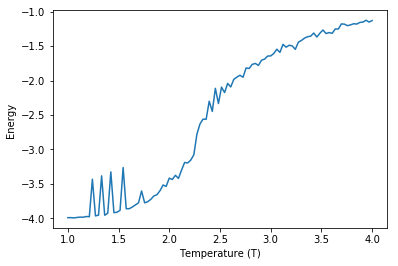

In [62]:
plt.plot(T, Energy_new, label=' Energy')
plt.xlabel("Temperature (T)")
plt.ylabel("Energy ")

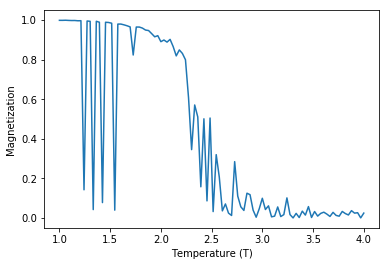

In [63]:
plt.plot(T, abs(Magnetization_new),label='Magnetization');
plt.xlabel("Temperature (T)");
plt.ylabel("Magnetization ");